<a href="https://colab.research.google.com/github/Hossein97Py/Coursera_Course2/blob/main/Neural%20Network%20Classifier%20Fashion%20Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Dataset
For this tutorial we will use the MNIST Fashion Dataset. This is a dataset that is included in keras.

This dataset includes 60,000 images for training and 10,000 images for validation/testing.

# Know the Data

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load dataset
fashion_mnist = keras.datasets.fashion_mnist  
# split into tetsing and training
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() 

4431872/4422102 [==============================] - 0s 0us/step


In [5]:
train_images.shape

(60000, 28, 28)

شصت هزار عکس که هر عکس ابعادش 28 پیکسل در 28 پیکسل هست

In [7]:
train_images[45, :, :]

array([[  0,   0,   0,   1,   0,   0,   0,   0,   0,  34, 148, 202, 107,
         84, 162, 198,  90,  26,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  21, 107, 166, 168, 152, 204, 238,
        248, 237, 190, 142, 178, 158,  98,  17,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,  55, 188, 140, 131, 121, 119, 116, 146,
        157, 132, 115, 136, 125, 140, 143, 181,  51,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 167, 134, 113, 130, 134, 140, 132, 125,
        125, 131, 135, 130, 133, 131, 115, 135, 163,   6,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  58, 148, 133, 124, 134, 128, 135, 128, 133,
        130, 133, 137, 138, 130, 124, 130, 133, 147,  82,   0,   1,   0,
          0,   0],
       [  0,   0,   0,   0,  86, 148, 158, 139, 124, 120, 131, 134, 132,
        134, 124, 134, 132, 137, 126, 137, 136, 146, 114,   0,   0,   0,
          0,   0],
       [  

In [9]:
train_labels.shape


(60000,)

In [11]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

لیبل‌ها شامل اعدادی بین 0 تا 9 هستند که هر عدد نشان‌دهنده یک نوع پوشیدنی هست. یک آرایه میسازیم که بفهمیم چی به چیه

In [12]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

حالا به بعضی از این عکسها نگاه کنیم

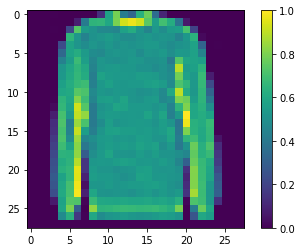

In [31]:
plt.figure()
plt.imshow(train_images[45])
plt.colorbar()
plt.grid(False)
plt.show()

# Data Preprocessing

در اینجا مرحله پیش پردازش صرفا شامل نرمال کردن اعداد شدت پیکسل ها هست. بین صفر و یک نرمال میکنیم که محاسبات سریعتر باشه

In [18]:
train_images = train_images / 255.0

test_images = test_images / 255.0

# Building the Model

اینجا از مدل ترتیبی کراس استفاده میکنیم . مدل شبکه عصبی هست با سه لایه.

 This model represents a feed-forward neural network (one that passes values from left to right)

In [20]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

مدل مون سه لایه هست 

> لایه اولش لایه ورودی میشه اون فلتن باعث میشه ورودی رو به صورت وکتور دربیاره که میشه 784 نورون. هر پیکسل با یک نورون اسوشییت میشه



> لایه دوم لایه مخفی هست . دنس یعنی این لایه کاملا کانکت هست و هر نورون لایه قبلی به تمام نورون های این لایه متصله. اینجا 128 نورون داریم اکتیویشن فانکشن هم  rectify linear unit هست



> لایه سوم لایه خروجی هست که 10 تا نورون داره که خروجی مدل رو مشخص میکنه . هر نورون مشخص میکنه احتمال اینکه یک عکس مال هر کدوم از کلاس لباس ها باشه چقدره
The activation function softmax is used on this layer to calculate a probabillity distribution for each class. This means the value of any neuron in this layer will be between 0 and 1, where 1 represents a high probabillity of the image being that class.







# Compile the Model

The last step in building the model is to define the loss function, optimizer and metrics we would like to track. I won't go into detail about why we chose each of these right now.

In [21]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training the Model

Now it's finally time to train the model. Since we've already done all the work on our data this step is as easy as calling a single method.

In [23]:
# we pass the data, labels and epochs and watch the magic!
model.fit(train_images, train_labels, epochs=10)  

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4961 - accuracy: 0.8261
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3756 - accuracy: 0.8646
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3358 - accuracy: 0.8774
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3131 - accuracy: 0.8849
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2961 - accuracy: 0.8900
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2793 - accuracy: 0.8970
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2666 - accuracy: 0.9002
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2571 - accuracy: 0.9046
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2466 - accuracy: 0.9079
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.236

# Evaluating the Model

Now it's time to test/evaluate the model. We can do this quite easily using another builtin method from keras.

The verbose argument is defined from the keras documentation as: "verbose: 0 or 1. Verbosity mode. 0 = silent, 1 = progress bar."

In [24]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

313/313 [==============================] - 2s 3ms/step - loss: 0.3407 - accuracy: 0.8787
Test accuracy: 0.8787000179290771


# Making Predictions

برای پیش بینی و استفاده از مدل یک آرایه به فرمی که مشخص کرده بودیم از دیتا به مدل میدیم 

In [25]:
predictions = model.predict(test_images)

In [26]:
predictions[0]

array([2.5522653e-09, 2.0438616e-11, 9.7511004e-09, 5.8150831e-11,
       3.8241449e-10, 1.3038322e-03, 5.2562442e-08, 2.3791434e-03,
       1.3577367e-08, 9.9631691e-01], dtype=float32)

که خوب دیدیم بیشترین احتمال برای کلاس دهم هست که انکل بوت بود. تو شکل هم همینه

In [30]:
class_names[9]

'Ankle boot'

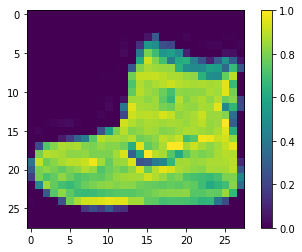

In [32]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

البته اینکار رو هم میشه کرد:

In [33]:
np.argmax(predictions[0]) 

9

In [34]:
test_labels[0]

9

THE END 

1401-06-25